<a href="https://colab.research.google.com/github/Uriel-MCarvalho/CIENCIA-DE-DADOS/blob/main/Exp_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Link Overlaef:  https://www.overleaf.com/project/64d000bcdaa22c1e7038659b


# Experimento 01 Laboratório de Mecânica Clássica 1

### Objetivos:
**Analise os dados e responda:** Os resultados das medidas mostram que o alcance
horizontal do projétil depende da altura da posição de partida?

**Analise os dados e responda:** Os resultados das medidas mostram que a velocidade com que o projétil abandonou a
rampa depende da altura da posição de soltura?

**Analise os dados e responda:** A energia potencial que se encontrava “armazenada” na esfera foi toda convertida em
energia cinética de translação? Pelo princípio da conservação da energia, como estão
relacionadas as modalidades de energia potencial, cinética de translação e cinética de
rotação de uma esfera abandonada sobre uma rampa de altura h?


## Tratamento dos dados

Os dados foram coletados cuidadosamente no laboratório e brevimente filtrados.

### Importação e classificação dos dados




In [ ]:
import pandas as pd
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/UNB/2023-2/LABORATÓRIO DE FÍSICA CLÁSSICA 1/Experimentos/EXP_01/dados_exp_01.xlsx')
print (df) # Visualizando dataset

In [ ]:
# Verificando tipos dos dados e se é necessário algum tipo de tratamento
print(df.dtypes)
print(df.columns)

Nº Lançamento       int64
Nível              object
Altura Mesa       float64
Peso              float64
Distancia         float64
dtype: object
Index(['Nº Lançamento ', 'Nível', 'Altura Mesa', 'Peso', 'Distancia'], dtype='object')


## Observações gerais

Antes de prosseguirmos, é crucial enfatizar alguns detalhes relevantes sobre a interpretação dos dados coletados.

A coluna "Nível" refere-se à posição da rampa na qual a esfera foi liberada. Essa posição é medida com base na altura do ponto específico em relação à superfície da mesa, a qual possui uma altura constante de 0,85cm, conforme especificado na coluna "Altura Mesa".

A coluna "Distância" representa a distância, em metros (m), percorrida horizontalmente pela esfera após ser liberada da rampa, iniciando seu movimento de queda livre. Foram realizadas 40 medições, as quais foram previamente submetidas a um processo de filtragem no laboratório, garantindo que não houvesse dados discrepantes ("outliers").

In [ ]:
# Conforme anotações feitas no laboratório, temos as posições na rampa em que a
# esfera foi liberada, medida em (m) metros.

def posiçao_inicial(row):
    if row['Nível'] == 'A':
        return  0.325
    elif row['Nível'] == 'B':
        return  0.251
    elif row['Nível'] == 'C':
        return  0.168
    elif row['Nível'] == 'D':
        return  0.115

#Aplicando para "Posição Esfera"

df['Posiçao Esfera'] = df.apply(posiçao_inicial, axis=1)

df['Altura Total'] = df['Altura Mesa'] + df['Posiçao Esfera']


# Exibindo o DataFrame resultante
print(df)


    Nº Lançamento  Nível  Altura Mesa  Peso  Distancia  Posiçao Esfera  \
0                1     A         0.85  13.6      0.721           0.325   
1                2     A         0.85  13.6      0.724           0.325   
2                3     A         0.85  13.6      0.732           0.325   
3                4     A         0.85  13.6      0.731           0.325   
4                5     A         0.85  13.6      0.721           0.325   
5                6     A         0.85  13.6      0.733           0.325   
6                7     A         0.85  13.6      0.720           0.325   
7                8     A         0.85  13.6      0.727           0.325   
8                9     A         0.85  13.6      0.730           0.325   
9               10     A         0.85  13.6      0.728           0.325   
10              11     B         0.85  13.6      0.635           0.251   
11              12     B         0.85  13.6      0.624           0.251   
12              13     B         0.85 

Adicionalmente, introduzimos uma nova coluna, "Altura Total", que considera a altura total entre a esfera e o chão, somando a altura da mesa (0,85 cm) à medida da posição na coluna "Posiçao Esfera". Agora estamos prontos para iniciar a análise dessas informações.

## Análise

Aqui verificaremos tudo que for necessário para responder as perguntas propostas

### Análise Geral



In [119]:
#Definindo algumas váriaveis

g = 9.81 # gravidade (m/s2)


d = 7.86 # Densidade do aço
y_1 = df['Altura Mesa'] # Altura Mesa em relação ao chão
y_2 = df['Posiçao Esfera'] # Altura esfera em relação à mesa
y_t = df['Altura Total'] # Altura esfera em relação ao chão
m = df['Peso']/1000 # Massa da esfera em kgs
x = df['Distancia'] # Distancia na horizontal
r = ((3*m)/(4*math.pi*d))**(1/3) #raio da esfera

df['Tempo'] = ((2*y_1/g)**(1/2))
t = df['Tempo']

df['Velocidade Escape'] = (2*g*y_2)**0.5
vx_0 = df['Velocidade Escape'] # Vel. de escape da rampa, o valor é horizontal

df['Velocidade Translaçao'] = x/t
vx_1 = df['Velocidade Translaçao']


w = vx_0 * r
I = (2*m*(r**2))/5


#Energia Potencial Gravitacional
# considerando apenas a altura entre a esfera e a mesa.
U_0 = m*y_t*g
U = m*y_t*g


#Energia Cinética Translação
T_0 = 0.5*m*(vx_0**2)
T = 0.5*m*(vx_1**2)

#Energia Cinética Rotação
R_0 = U - T_0
R = U_0 - T

#Energia Cinética Total
K_0 = R_0 + T_0
K = T + R


#Energia total do sistema
E_0 = K_0 + U_0
E = K + U


df_energia = pd.DataFrame({'Energia Cinetica 0':K_0, 'Energia Cinetica F':K,
                      'Energia Translação 0':T_0, 'Energia Translação F':T,
                      'Energia Rotacional 0':R_0,'Energia Rotacional F':R,
                      'Energia Potencial 0':U_0, 'Energia Potencial F':U,
                      'Energia Mecanica 0':E_0, 'Energia Mecanica F':E})



display(df_energia)
print(df)


,Energia Cinetica 0,Energia Cinetica F,Energia Translação 0,Energia Translação F,Energia Rotacional 0,Energia Rotacional F,Energia Potencial 0,Energia Potencial F,Energia Mecanica 0,Energia Mecanica F
0,0.156764,0.156764,0.043360,0.020399,0.113404,0.136365,0.156764,0.156764,0.313528,0.313528
1,0.156764,0.156764,0.043360,0.020569,0.113404,0.136195,0.156764,0.156764,0.313528,0.313528
2,0.156764,0.156764,0.043360,0.021026,0.113404,0.135738,0.156764,0.156764,0.313528,0.313528
3,0.156764,0.156764,0.043360,0.020968,0.113404,0.135795,0.156764,0.156764,0.313528,0.313528
4,0.156764,0.156764,0.043360,0.020399,0.113404,0.136365,0.156764,0.156764,0.313528,0.313528
5,0.156764,0.156764,0.043360,0.021083,0.113404,0.135681,0.156764,0.156764,0.313528,0.313528
6,0.156764,0.156764,0.043360,0.020342,0.113404,0.136422,0.156764,0.156764,0.313528,0.313528
7,0.156764,0.156764,0.043360,0.020739,0.113404,0.136024,0.156764,0.156764,0.313528,0.313528
8,0.156764,0.156764,0.043360,0.020911,0.113404,0.135853,0.156764,0.156764,0.313528,0.313528
9,0.156764,0.156764,0.043360,0.020797,0.113404,0.135967,0.156764,0.156764,0.313528,0.313528


    Nº Lançamento  Nível  Altura Mesa  Peso  Distancia  Posiçao Esfera  \
0                1     A         0.85  13.6      0.721           0.325   
1                2     A         0.85  13.6      0.724           0.325   
2                3     A         0.85  13.6      0.732           0.325   
3                4     A         0.85  13.6      0.731           0.325   
4                5     A         0.85  13.6      0.721           0.325   
5                6     A         0.85  13.6      0.733           0.325   
6                7     A         0.85  13.6      0.720           0.325   
7                8     A         0.85  13.6      0.727           0.325   
8                9     A         0.85  13.6      0.730           0.325   
9               10     A         0.85  13.6      0.728           0.325   
10              11     B         0.85  13.6      0.635           0.251   
11              12     B         0.85  13.6      0.624           0.251   
12              13     B         0.85 

In [ ]:
# Data Frame das médias, para facilitar a visualização

df_mean = df.groupby('Nível').agg(['mean', 'std']).reset_index()
display(df_mean)

df_mean_energy = df_energia.groupby('Energia Mecanica F').agg(['mean', 'std']).reset_index()
display(df_mean_energy)

Nível Nº Lançamento           Altura Mesa       Peso      Distancia  \
                  mean      std        mean  std  mean  std      mean   
0     A            5.5  3.02765        0.85  0.0  13.6  0.0    0.7267   
1     B           15.5  3.02765        0.85  0.0  13.6  0.0    0.6274   
2     C           25.5  3.02765        0.85  0.0  13.6  0.0    0.4950   
3     D           35.5  3.02765        0.85  0.0  13.6  0.0    0.3420   

            Posiçao Esfera      Altura Total          Tempo       \
        std           mean  std         mean  std      mean  std   
0  0.004900          0.325  0.0        1.175  0.0  0.416284  0.0   
1  0.004575          0.251  0.0        1.101  0.0  0.416284  0.0   
2  0.008832          0.168  0.0        1.018  0.0  0.416284  0.0   
3  0.007024          0.115  0.0        0.965  0.0  0.416284  0.0   

  Velocidade Escape      Velocidade Translaçao            
               mean  std                  mean       std  
0          2.525173  0.0              1.745682  0.011771  
1          2.219148  0.0              1.507143  0.010991  
2          1.815533  0.0              1.189091  0.021216  
3          1.502099  0.0              0.821554  0.016873

Energia Mecanica F Energia Cinetica 0      Energia Cinetica F       \
                                   mean  std               mean  std   
0           0.015343                0.0  0.0           0.015343  0.0   
1           0.015343                0.0  0.0           0.015343  0.0   
2           0.015343                0.0  0.0           0.015343  0.0   
3           0.022414                0.0  0.0           0.022414  0.0   
4           0.033487                0.0  0.0           0.033487  0.0   
5           0.043360                0.0  0.0           0.043360  0.0   

  Energia Translação 0      Energia Translação F            \
                  mean  std                 mean       std   
0                  0.0  0.0             0.004525  0.000236   
1                  0.0  0.0             0.004591  0.000214   
2                  0.0  0.0             0.004680  0.000095   
3                  0.0  0.0             0.009618  0.000343   
4                  0.0  0.0             0.015447  0.000226   
5                  0.0  0.0             0.020723  0.000279   

  Energia Rotacional 0      Energia Rotacional F            \
                  mean  std                 mean       std   
0                  0.0  0.0             0.010818  0.000236   
1                  0.0  0.0             0.010752  0.000214   
2                  0.0  0.0             0.010663  0.000095   
3                  0.0  0.0             0.012796  0.000343   
4                  0.0  0.0             0.018041  0.000226   
5                  0.0  0.0             0.022637  0.000279   

  Energia Potencial 0      Energia Potencial F      Energia Mecanica 0       
                 mean  std                mean  std               mean  std  
0            0.015343  0.0                 0.0  0.0           0.015343  0.0  
1            0.015343  0.0                 0.0  0.0           0.015343  0.0  
2            0.015343  0.0                 0.0  0.0           0.015343  0.0  
3            0.022414  0.0                 0.0  0.0           0.022414  0.0  
4            0.033487  0.0                 0.0  0.0           0.033487  0.0  
5            0.043360  0.0                 0.0  0.0           0.043360  0.0

### Respondendo o que foi proposto



**Os resultados das medidas mostram que o alcance
horizontal do projétil depende da altura da posição de partida?**

Sim, como veremos a frente, a velocidade de escape da esfera tem relação com a posição de partida, e a velocidade está relacionada com a distancia.

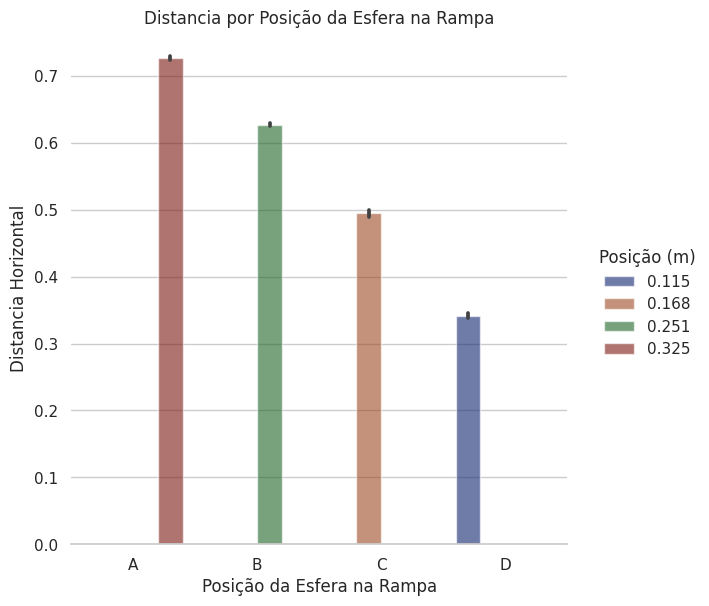

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie o gráfico de barras aninhadas
sns.set_theme(style="whitegrid")
graf = sns.catplot(
    data=df, kind="bar",
    x="Nível", y="Distancia", hue="Posiçao Esfera",
    palette="dark", alpha=.6, height=6
)

# Personalize o gráfico
graf.despine(left=True)
graf.set_axis_labels("Posição da Esfera na Rampa", "Distancia Horizontal")
graf.legend.set_title("Posição (m)")

# Defina o título
plt.title("Distancia por Posição da Esfera na Rampa")

# Exiba o gráfico
plt.show()

#Esquisito isso ter ficado linear não ??  Não, o alcance horizontal é uma função
# de primeiro grau.

**Os resultados das medidas mostram que a velocidade com que o projétil abandonou a rampa depende da altura da posição de soltura?**

Sim, como avaliado na função, da velocidade fica claro que a altura inical faz parte da equação.

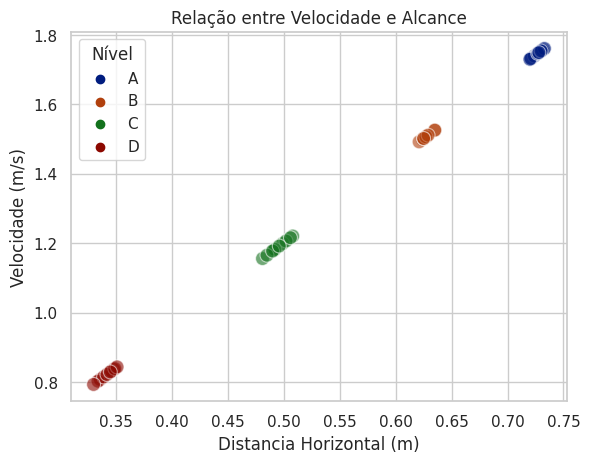

In [ ]:
#Primeiro vamos definir uma coluna "Velocidades" que vai descrever a velocidade
#de acordo com a distancia horizontal percorrida


# Crie um gráfico de dispersão
sns.set_theme(style="whitegrid")
graf = sns.scatterplot(
    data=df,
    x=x, y=vx_1, hue="Nível",
    palette="dark", alpha=0.6, s=100
)

# Personalize o gráfico
graf.set(xlabel="Distancia Horizontal (m)", ylabel="Velocidade (m/s)")
graf.legend(title="Nível")

# Defina o título
plt.title("Relação entre Velocidade e Alcance")

# Exiba o gráfico
plt.show()

**A energia potencial que se encontrava “armazenada” na esfera foi toda convertida em
energia cinética de translação? Pelo princípio da conservação da energia, como estão
relacionadas as modalidades de energia potencial, cinética de translação e cinética de
rotação de uma esfera abandonada sobre uma rampa de altura h?**

Não, a energia potencial \(U\) foi convertida em energia cinética de translação \(T\) e rotação \(R\), onde

\
\begin{align*}
|T - R| &= U
\
\end{align*}


A energia mecânica se conserva, como podemos observar.






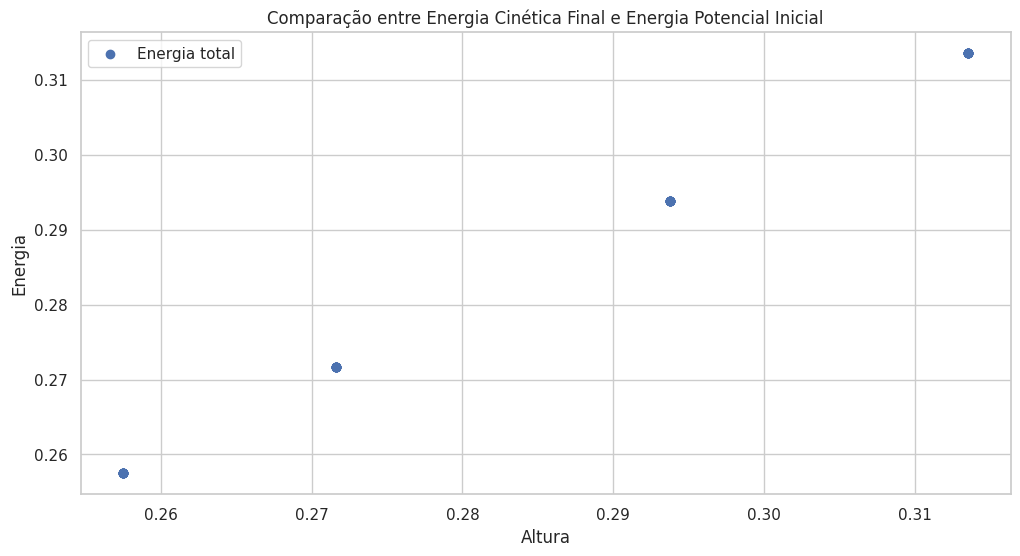

In [ ]:
import matplotlib.pyplot as plt

y = df['Nível']

# Criar o gráfico de comparação
plt.figure(figsize=(12, 6))
plt.scatter(E_0, E, label='Energia total')  # Gráfico de dispersão para Potencial Inicial

plt.xlabel('Energia Total Inicial')
plt.ylabel('Energia Total Final')
plt.legend()
plt.title('Comparação entre Energia Cinética Final e Energia Potencial Inicial')
plt.grid(True)

plt.show()
